In [1]:
import gensim
import numpy as np
import tensorflow as tf

In [2]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.tr.300.vec.gz
!gzip -d cc.tr.300.vec.gz


--2024-10-08 16:36:57--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.tr.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.7.128, 13.35.7.38, 13.35.7.82, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.7.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1261500728 (1.2G) [binary/octet-stream]
Saving to: ‘cc.tr.300.vec.gz’

cc.tr.300.vec.gz    100%[===================>]   1.17G  8.73MB/s    in 65s     

2024-10-08 16:38:03 (18.5 MB/s) - ‘cc.tr.300.vec.gz’ saved [1261500728/1261500728]



In [3]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296185 sha256=1b2d9364bcbbcac8a206e2531eebfc7480f3165804d00492f7ab8d5462a86784
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [4]:
import fasttext

In [5]:
import numpy as np
import os
import re

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [8]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
import numpy as np
import pandas as pd

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
def remove_stopwords(text):
    # Türkçe stop kelimeleri yükleyin
    stop_words = set(stopwords.words('turkish'))

    # Metni tokenize edin
    word_tokens = word_tokenize(text, language='turkish')

    # Stop kelimeleri temizleyin
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

    # Temizlenmiş metni birleştirin
    cleaned_text = ' '.join(filtered_text)
    return cleaned_text

In [12]:
data = []
label = []
import re
def get_txt(file_path,real_or_fake):
    func_data = []
    func_label = []
    for filename in os.listdir(file_path):
        #print(filename)
        if(filename.endswith('.txt')):
            with open(file_path+"/"+filename, 'r', encoding= 'utf-8' ) as file:
            #text clearing
                text = file.read()
                text = re.sub(r'[^\w\s]', '', text)
                text = re.sub(r'[ \n]+', ' ', text)
                text = text.strip().lower()

                #stop wordsleri temizleme 1272770 -> 1138016
                clean_text = remove_stopwords(text)
                data.append(clean_text)
                func_data.append(clean_text)
                if real_or_fake == 'real':
                    label.append(1)
                    func_label.append(1)
                else:
                    label.append(0)
                    func_label.append(0)
    return func_data, func_label



X_train_val_real, y_train_val_real = get_txt("/content/drive/My Drive/collab1/DOSYALAR/SON_DATASET/random10_90(960-8756)/90-train/real",'real')
X_train_val_fake, y_train_val_fake = get_txt("/content/drive/My Drive/collab1/DOSYALAR/SON_DATASET/random10_90(960-8756)/90-train/fake",'fake')


#print(len(X_train_val_real),len(y_train_val_real))
#print(len(X_train_val_fake),len(y_train_val_fake))

X_train_val_combined = X_train_val_real + X_train_val_fake
y_train_val_combined = y_train_val_real + y_train_val_fake

#print()
#print(len(X_train_val_combined))
#print(len(y_train_val_combined))


X_test_val_real, y_test_val_real = get_txt("/content/drive/My Drive/collab1/DOSYALAR/SON_DATASET/random10_90(960-8756)/10-test/real",'real')
X_test_val_fake, y_test_val_fake = get_txt("/content/drive/My Drive/collab1/DOSYALAR/SON_DATASET/random10_90(960-8756)/10-test/fake",'fake')

#print(len(X_test_val_real),len(y_test_val_real))
#print(len(X_test_val_fake),len(y_test_val_fake))

X_test_val_combined = X_test_val_real + X_test_val_fake
y_test_val_combined = y_test_val_real + y_test_val_fake

#print(len(X_test_val_combined),len(y_train_val_combined))


#shuffle train
X_train_val_combined = np.array(X_train_val_combined)
y_train_val_combined = np.array(y_train_val_combined)
indices = np.random.permutation(len(X_train_val_combined))
X_train_val_combined = X_train_val_combined[indices]
y_train_val_combined = y_train_val_combined[indices]


#shuffle test
X_test_val_combined = np.array(X_test_val_combined)
y_test_val_combined = np.array(y_test_val_combined)
indices2 =  np.random.permutation(len(X_test_val_combined))
X_test_val_combined = X_test_val_combined[indices2]
y_test_val_combined = y_test_val_combined[indices2]


print(len(X_train_val_combined),len(y_train_val_combined))
print(len(X_test_val_combined),len(y_test_val_combined))


'''
real_txt, real_label =  get_txt('/content/drive/My Drive/collab1/toplama_full_dataset/real', 'real')
fake_txt, fake_label = get_txt('/content/drive/My Drive/collab1/toplama_full_dataset/fake', 'fake')


#shuffle data
data = np.array(data)
label = np.array(label)
indices = np.random.permutation(len(data))
data = data[indices]
label = label[indices]
'''




'''

# Train-Validation ve Test setlerini ayırma
X_train_val, X_test, y_train_val, y_test = train_test_split(X, label, test_size=0.2, random_state=42)

# Train-Validation setini Train ve Validation setlerine ayırma
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# Burada test_size 0.25 kullanarak train-validation setini 0.8 x 0.25 = 0.2 (yani 20%) oranında böldük
# random_state, tekrarlanabilirlik için kullanılır


'''





8756 8756
960 960


'\n\n# Train-Validation ve Test setlerini ayırma\nX_train_val, X_test, y_train_val, y_test = train_test_split(X, label, test_size=0.2, random_state=42)\n\n# Train-Validation setini Train ve Validation setlerine ayırma\nX_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)\n# Burada test_size 0.25 kullanarak train-validation setini 0.8 x 0.25 = 0.2 (yani 20%) oranında böldük\n# random_state, tekrarlanabilirlik için kullanılır\n\n\n'

8756 960


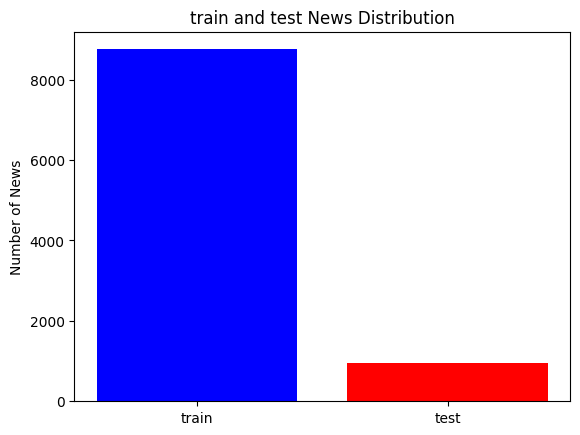

In [ ]:
#plot
import matplotlib.pyplot as plt
real_new_count = len(X_train_val_combined)
fake_new_count = len(X_test_val_combined)
print(real_new_count, fake_new_count)

#create the bar plot
plt.bar(['train', 'test'], [real_new_count, fake_new_count], color = ['blue', 'red'])
plt.title('train and test News Distribution')
plt.ylabel('Number of News')

plt.show()

In [13]:
from gensim.models import KeyedVectors

In [14]:
# FastText'ten önceden eğitilmiş gömme vektörlerini yükleme
embedding_model = KeyedVectors.load_word2vec_format('cc.tr.300.vec')

In [15]:
# Metinleri gömme vektörlerine dönüştürme
embedding_dim = 300
def embedding(data):
  X = []
  for d in data:
    embeddings = [embedding_model[word] for word in d.split() if word in embedding_model]
    if embeddings:
      X.append(np.mean(embeddings, axis=0))
    else:
       X.append(np.zeros(embedding_dim))
  return np.array(X)

#train

X_train_val_combined = embedding(X_train_val_combined)

#test

X_test_val_combined = embedding(X_test_val_combined)

print(X_train_val_combined)
print(X_train_val_combined.shape)
print(X_test_val_combined.shape)

[[-0.01123281  0.00420156  0.0487422  ...  0.00349375 -0.01440156
  -0.01069219]
 [-0.01180728  0.00053455  0.03902001 ... -0.01949636 -0.00168364
  -0.00443455]
 [-0.00018444 -0.00356556  0.04546721 ... -0.00129768 -0.00999139
  -0.00704967]
 ...
 [-0.00637213  0.01877049  0.03479836 ...  0.01723443 -0.01091967
  -0.00234262]
 [ 0.00906172 -0.00480859  0.047525   ... -0.01428672  0.00535156
  -0.00314375]
 [-0.03239138  0.02826897  0.04069483 ...  0.00152759 -0.00649138
  -0.00438965]]
(8756, 300)
(960, 300)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
'''
# Train-Validation ve Test setlerini ayırma
X_train_val, X_test, y_train_val, y_test = train_test_split(X, label, test_size=0.2, random_state=42)

# Train-Validation setini Train ve Validation setlerine ayırma
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# Burada test_size 0.25 kullanarak train-validation setini 0.8 x 0.25 = 0.2 (yani 20%) oranında böldük
# random_state, tekrarlanabilirlik için kullanılır
'''

X_train_val = X_train_val_combined
X_test = X_test_val_combined
y_train_val = y_train_val_combined
y_test = y_test_val_combined

print(len(X_train_val), len(y_train_val))
print(len(X_test),len(y_test))

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)




8756 8756
960 960


In [18]:

import tensorflow as tf

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(embedding_dim,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])


In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [26]:
# Modeli eğitme
model.fit(X_train_val, y_train_val, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
'''
Epoch 1/15
411/411 [==============================] - 5s 7ms/step - loss: 0.5323 - accuracy: 0.7434 - val_loss: 0.4524 - val_accuracy: 0.7812
Epoch 2/15
411/411 [==============================] - 2s 6ms/step - loss: 0.3446 - accuracy: 0.8549 - val_loss: 0.2997 - val_accuracy: 0.8876
Epoch 3/15
411/411 [==============================] - 2s 5ms/step - loss: 0.2876 - accuracy: 0.8864 - val_loss: 0.2705 - val_accuracy: 0.8931
Epoch 4/15
411/411 [==============================] - 2s 5ms/step - loss: 0.2526 - accuracy: 0.9039 - val_loss: 0.2469 - val_accuracy: 0.9027
Epoch 5/15
411/411 [==============================] - 2s 5ms/step - loss: 0.2305 - accuracy: 0.9118 - val_loss: 0.2357 - val_accuracy: 0.9127
Epoch 6/15
411/411 [==============================] - 2s 6ms/step - loss: 0.2097 - accuracy: 0.9188 - val_loss: 0.2693 - val_accuracy: 0.8963
Epoch 7/15
411/411 [==============================] - 1s 3ms/step - loss: 0.1901 - accuracy: 0.9289 - val_loss: 0.2202 - val_accuracy: 0.9210
Epoch 8/15
411/411 [==============================] - 1s 4ms/step - loss: 0.1881 - accuracy: 0.9278 - val_loss: 0.2603 - val_accuracy: 0.8968
Epoch 9/15
411/411 [==============================] - 2s 6ms/step - loss: 0.1774 - accuracy: 0.9328 - val_loss: 0.2079 - val_accuracy: 0.9219
Epoch 10/15
411/411 [==============================] - 2s 5ms/step - loss: 0.1636 - accuracy: 0.9383 - val_loss: 0.1945 - val_accuracy: 0.9296
Epoch 11/15
411/411 [==============================] - 3s 7ms/step - loss: 0.1560 - accuracy: 0.9409 - val_loss: 0.1975 - val_accuracy: 0.9269
Epoch 12/15
411/411 [==============================] - 2s 6ms/step - loss: 0.1515 - accuracy: 0.9449 - val_loss: 0.1833 - val_accuracy: 0.9379
Epoch 13/15
411/411 [==============================] - 3s 7ms/step - loss: 0.1391 - accuracy: 0.9520 - val_loss: 0.1845 - val_accuracy: 0.9338
Epoch 14/15
411/411 [==============================] - 3s 7ms/step - loss: 0.1294 - accuracy: 0.9526 - val_loss: 0.2087 - val_accuracy: 0.9301
Epoch 15/15
411/411 [==============================] - 3s 6ms/step - loss: 0.1243 - accuracy: 0.9552 - val_loss: 0.1976 - val_accuracy: 0.9333
'''


''' 50 - 16
Epoch 1/50
548/548 [==============================] - 4s 6ms/step - loss: 0.4861 - accuracy: 0.7676 - val_loss: 0.3226 - val_accuracy: 0.8744
Epoch 2/50
548/548 [==============================] - 3s 6ms/step - loss: 0.3206 - accuracy: 0.8713 - val_loss: 0.2877 - val_accuracy: 0.8881
Epoch 3/50
548/548 [==============================] - 4s 7ms/step - loss: 0.2650 - accuracy: 0.8980 - val_loss: 0.2246 - val_accuracy: 0.9146
Epoch 4/50
548/548 [==============================] - 4s 7ms/step - loss: 0.2456 - accuracy: 0.9049 - val_loss: 0.1893 - val_accuracy: 0.9324
Epoch 5/50
548/548 [==============================] - 4s 7ms/step - loss: 0.2267 - accuracy: 0.9129 - val_loss: 0.1754 - val_accuracy: 0.9383
Epoch 6/50
548/548 [==============================] - 4s 7ms/step - loss: 0.2038 - accuracy: 0.9241 - val_loss: 0.1646 - val_accuracy: 0.9447
Epoch 7/50
548/548 [==============================] - 4s 7ms/step - loss: 0.1948 - accuracy: 0.9245 - val_loss: 0.1471 - val_accuracy: 0.9484
Epoch 8/50
548/548 [==============================] - 4s 7ms/step - loss: 0.1826 - accuracy: 0.9318 - val_loss: 0.1436 - val_accuracy: 0.9438
Epoch 9/50
548/548 [==============================] - 4s 7ms/step - loss: 0.1706 - accuracy: 0.9349 - val_loss: 0.1214 - val_accuracy: 0.9598
Epoch 10/50
548/548 [==============================] - 3s 6ms/step - loss: 0.1609 - accuracy: 0.9400 - val_loss: 0.1159 - val_accuracy: 0.9566
Epoch 11/50
548/548 [==============================] - 4s 7ms/step - loss: 0.1535 - accuracy: 0.9405 - val_loss: 0.1151 - val_accuracy: 0.9580
Epoch 12/50
548/548 [==============================] - 2s 4ms/step - loss: 0.1495 - accuracy: 0.9428 - val_loss: 0.1142 - val_accuracy: 0.9625
Epoch 13/50
548/548 [==============================] - 4s 8ms/step - loss: 0.1490 - accuracy: 0.9456 - val_loss: 0.1034 - val_accuracy: 0.9726
Epoch 14/50
548/548 [==============================] - 7s 13ms/step - loss: 0.1422 - accuracy: 0.9464 - val_loss: 0.0944 - val_accuracy: 0.9676
Epoch 15/50
548/548 [==============================] - 3s 6ms/step - loss: 0.1297 - accuracy: 0.9494 - val_loss: 0.0871 - val_accuracy: 0.9712
Epoch 16/50
548/548 [==============================] - 4s 6ms/step - loss: 0.1246 - accuracy: 0.9545 - val_loss: 0.0879 - val_accuracy: 0.9721
Epoch 17/50
548/548 [==============================] - 4s 7ms/step - loss: 0.1208 - accuracy: 0.9560 - val_loss: 0.0835 - val_accuracy: 0.9703
Epoch 18/50
548/548 [==============================] - 4s 6ms/step - loss: 0.1178 - accuracy: 0.9585 - val_loss: 0.0749 - val_accuracy: 0.9749
Epoch 19/50
548/548 [==============================] - 4s 7ms/step - loss: 0.1161 - accuracy: 0.9568 - val_loss: 0.0816 - val_accuracy: 0.9749
Epoch 20/50
548/548 [==============================] - 4s 7ms/step - loss: 0.1144 - accuracy: 0.9587 - val_loss: 0.1365 - val_accuracy: 0.9438
Epoch 21/50
548/548 [==============================] - 4s 7ms/step - loss: 0.1060 - accuracy: 0.9620 - val_loss: 0.0714 - val_accuracy: 0.9758
Epoch 22/50
548/548 [==============================] - 4s 7ms/step - loss: 0.1064 - accuracy: 0.9629 - val_loss: 0.0668 - val_accuracy: 0.9767
Epoch 23/50
548/548 [==============================] - 4s 7ms/step - loss: 0.1025 - accuracy: 0.9622 - val_loss: 0.0687 - val_accuracy: 0.9772
Epoch 24/50
548/548 [==============================] - 3s 6ms/step - loss: 0.1020 - accuracy: 0.9639 - val_loss: 0.0646 - val_accuracy: 0.9799
Epoch 25/50
548/548 [==============================] - 4s 6ms/step - loss: 0.0977 - accuracy: 0.9635 - val_loss: 0.0644 - val_accuracy: 0.9808
Epoch 26/50
548/548 [==============================] - 3s 5ms/step - loss: 0.0920 - accuracy: 0.9646 - val_loss: 0.0659 - val_accuracy: 0.9804
Epoch 27/50
548/548 [==============================] - 2s 4ms/step - loss: 0.0968 - accuracy: 0.9649 - val_loss: 0.0530 - val_accuracy: 0.9826
Epoch 28/50
548/548 [==============================] - 2s 4ms/step - loss: 0.0888 - accuracy: 0.9670 - val_loss: 0.0506 - val_accuracy: 0.9849
Epoch 29/50
548/548 [==============================] - 2s 4ms/step - loss: 0.0898 - accuracy: 0.9665 - val_loss: 0.0610 - val_accuracy: 0.9799
Epoch 30/50
548/548 [==============================] - 2s 4ms/step - loss: 0.0891 - accuracy: 0.9670 - val_loss: 0.0462 - val_accuracy: 0.9868
Epoch 31/50
548/548 [==============================] - 3s 5ms/step - loss: 0.0867 - accuracy: 0.9690 - val_loss: 0.0470 - val_accuracy: 0.9854
Epoch 32/50
548/548 [==============================] - 3s 6ms/step - loss: 0.0875 - accuracy: 0.9677 - val_loss: 0.0470 - val_accuracy: 0.9845
Epoch 33/50
548/548 [==============================] - 4s 7ms/step - loss: 0.0850 - accuracy: 0.9683 - val_loss: 0.0439 - val_accuracy: 0.9881
Epoch 34/50
548/548 [==============================] - 4s 7ms/step - loss: 0.0842 - accuracy: 0.9686 - val_loss: 0.0403 - val_accuracy: 0.9886
Epoch 35/50
548/548 [==============================] - 3s 6ms/step - loss: 0.0752 - accuracy: 0.9726 - val_loss: 0.0366 - val_accuracy: 0.9909
Epoch 36/50
548/548 [==============================] - 4s 7ms/step - loss: 0.0709 - accuracy: 0.9749 - val_loss: 0.0399 - val_accuracy: 0.9895
Epoch 37/50
548/548 [==============================] - 4s 7ms/step - loss: 0.0789 - accuracy: 0.9698 - val_loss: 0.0397 - val_accuracy: 0.9881
Epoch 38/50
548/548 [==============================] - 4s 7ms/step - loss: 0.0663 - accuracy: 0.9766 - val_loss: 0.0395 - val_accuracy: 0.9877


'''


Epoch 1/100


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 2)

In [ ]:
# Modeli değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Verisi - Loss: {:.4f}, Accuracy: {:.4f}".format(loss, accuracy))
'''
30/30 [==============================] - 0s 8ms/step - loss: 0.1525 - accuracy: 0.9479
Test Verisi - Loss: 0.1525, Accuracy: 0.9479


'''

30/30 [==============================] - 0s 4ms/step - loss: 0.1255 - accuracy: 0.9688
Test Verisi - Loss: 0.1255, Accuracy: 0.9688


'\n30/30 [==============================] - 0s 8ms/step - loss: 0.1525 - accuracy: 0.9479\nTest Verisi - Loss: 0.1525, Accuracy: 0.9479\n\n\n'

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Predict probabilities on test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

'''
30/30 [==============================] - 0s 4ms/step
Confusion Matrix:
[[423  33]
 [ 17 487]]
'''
'''
 [[428  28]
 [ 16 488]] ->  , epochs=50, batch_size=16 - 38 early stopping

'''

'''
50 32
Confusion Matrix:
[[437  19]
 [ 16 488]]
 - early stopping
'''

'''
100 32
[[440  16]
 [ 14 490]]
 31 early stopping

'''

30/30 [==============================] - 0s 3ms/step
Confusion Matrix:
[[440  16]
 [ 14 490]]


'\n50 32\nConfusion Matrix:\n[[437  19]\n [ 16 488]]\n\n'

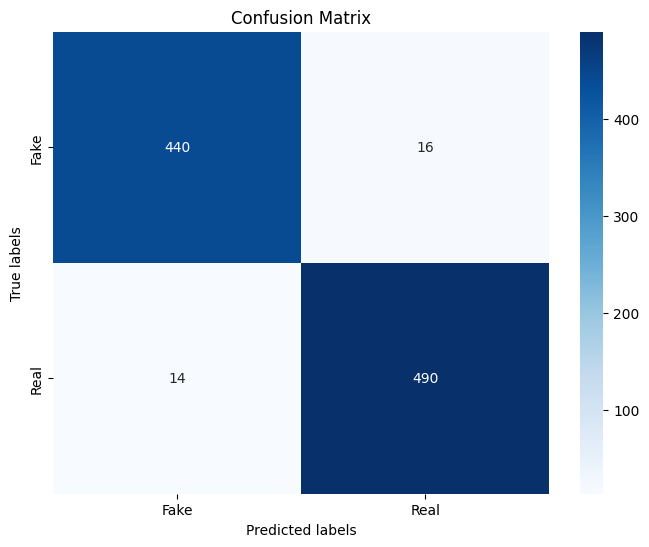

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()





In [ ]:
from sklearn.metrics import recall_score

# Compute recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall) #Recall: 0.9662698412698413



Recall: 0.9722222222222222


In [ ]:
from sklearn.metrics import f1_score

# Compute F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1) #F1-score: 0.9511718750000001

F1-score: 0.9702970297029704


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])

print(report)

'''
              precision    recall  f1-score   support

        Fake       0.96      0.93      0.94       456
        Real       0.94      0.97      0.95       504

    accuracy                           0.95       960
   macro avg       0.95      0.95      0.95       960
weighted avg       0.95      0.95      0.95       960


'''

              precision    recall  f1-score   support

        Fake       0.97      0.96      0.97       456
        Real       0.97      0.97      0.97       504

    accuracy                           0.97       960
   macro avg       0.97      0.97      0.97       960
weighted avg       0.97      0.97      0.97       960



'\n              precision    recall  f1-score   support\n\n        Fake       0.96      0.93      0.94       456\n        Real       0.94      0.97      0.95       504\n\n    accuracy                           0.95       960\n   macro avg       0.95      0.95      0.95       960\nweighted avg       0.95      0.95      0.95       960\n\n\n'